# Project 2: Credit Card Fraud Detection

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Credit Card Dataset
data = pd.read_excel("CreditCardDataset.xlsx")

## Performing EDA

In [3]:
# Displaying the head of the data to get overview of the distribution
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
1     2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
2     7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
3    11  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   
4    12 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850 -0.608581   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
1  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
2 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
3  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744  0.548265   
4  0.003603 -0.436167  ...  0.499625  1.353650 -0.256573 -0.065084 -0.039124   

        V26       V27       V28 

In [4]:
# Summary statistics
print(data.describe())

                Time            V1            V2            V3            V4  \
count   57355.000000  57355.000000  57355.000000  57355.000000  57355.000000   
mean    94577.357074     -0.029092      0.030156     -0.055749      0.035521   
std     47505.713234      2.061391      1.711228      1.733364      1.484621   
min         2.000000    -36.802320    -63.344698    -48.325589     -5.519697   
25%     53943.500000     -0.927615     -0.588747     -0.922554     -0.839400   
50%     84641.000000      0.015980      0.071801      0.168619     -0.005637   
75%    139140.000000      1.314129      0.815413      1.019384      0.764271   
max    172777.000000      2.454930     22.057729      3.940337     16.715537   

                 V5            V6            V7            V8            V9  \
count  57355.000000  57355.000000  57355.000000  57355.000000  57355.000000   
mean      -0.022664     -0.006869     -0.032448      0.006142     -0.017667   
std        1.508300      1.361819      1.5

In [5]:
data.dropna(inplace=True)

In [6]:
print(data.dtypes)

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


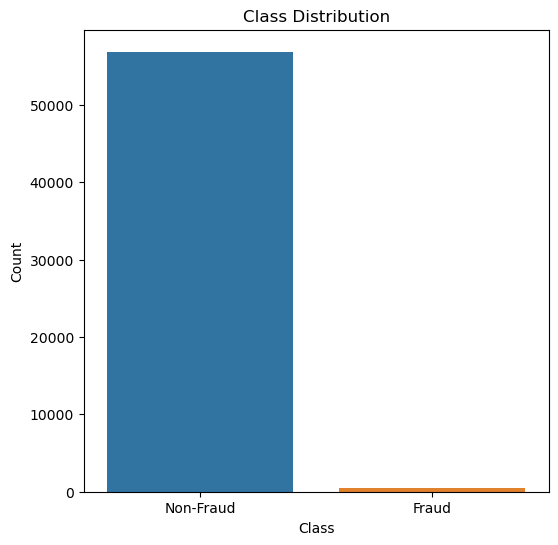

In [7]:
# Count the number of samples in each class
class_counts = data['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 6))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show();

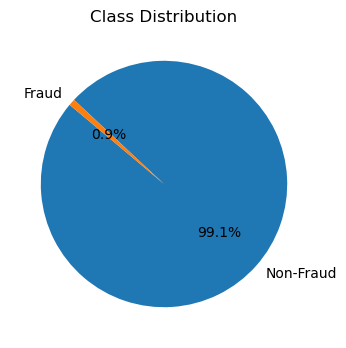

In [8]:
# Plot the class distribution
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

In [9]:
print("Non Fraud: {}".format(class_counts[0]))
print("Fraud: {}".format(class_counts[1]))

Non Fraud: 56863
Fraud: 492


## Observation from the Visualization
The visualization analysis of the dataset reveals a significant class imbalance issue. The Non-Fraud class comprises 99.1% of the data, with 56,863 samples, while the Fraud class makes up just 0.9%, with 492 samples. The pie chart and count plot vividly depict this imbalance. This distribution discrepancy poses a challenge for creating accurate fraud detection models, as they may be biased toward the majority class. To mitigate this issue, resampling techniques and careful selection of evaluation metrics are necessary to ensure the model can effectively identify both fraudulent and non-fraudulent transactions. Addressing this imbalance is vital for robust fraud detection.

In [10]:
# Performing Standard Scaler 
scaler = StandardScaler()
data["Amount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))

# Setting target variable as Class
X = data.drop("Class", axis=1)
y = data["Class"]

# Applying SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X, y)

# Convert data to PyTorch tensors
X_train_resampled = torch.from_numpy(X_train_resampled.to_numpy()).float()
y_train_resampled = torch.from_numpy(y_train_resampled.to_numpy()).long()

# Split the train test with 80% for train and 20% for Validation
X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

## SMOTE Analysis
SMOTE is used to address class imbalance in machine learning. It balances datasets by creating synthetic samples for the minority class, improving model accuracy and reducing overfitting. This technique helps models generalize better and maintain data integrity, making them more effective in handling imbalanced datasets.

## Neural Network using Pytorch Implemetation

Epoch [1/10], Training Loss: 28.4896, Training Accuracy: 67.96%, Validation Loss: 10.4678, Validation Accuracy: 79.36%
Epoch [2/10], Training Loss: 12.4043, Training Accuracy: 78.82%, Validation Loss: 5.1402, Validation Accuracy: 89.27%
Epoch [3/10], Training Loss: 9.2769, Training Accuracy: 84.23%, Validation Loss: 11.5395, Validation Accuracy: 85.67%
Epoch [4/10], Training Loss: 9.9919, Training Accuracy: 86.14%, Validation Loss: 21.8879, Validation Accuracy: 82.70%
Epoch [5/10], Training Loss: 6.9435, Training Accuracy: 89.45%, Validation Loss: 0.9670, Validation Accuracy: 95.08%
Epoch [6/10], Training Loss: 6.7123, Training Accuracy: 90.28%, Validation Loss: 9.8094, Validation Accuracy: 90.76%
Epoch [7/10], Training Loss: 6.3452, Training Accuracy: 91.21%, Validation Loss: 5.8223, Validation Accuracy: 93.19%
Epoch [8/10], Training Loss: 5.8580, Training Accuracy: 91.69%, Validation Loss: 4.5804, Validation Accuracy: 94.16%
Epoch [9/10], Training Loss: 6.0933, Training Accuracy: 92.

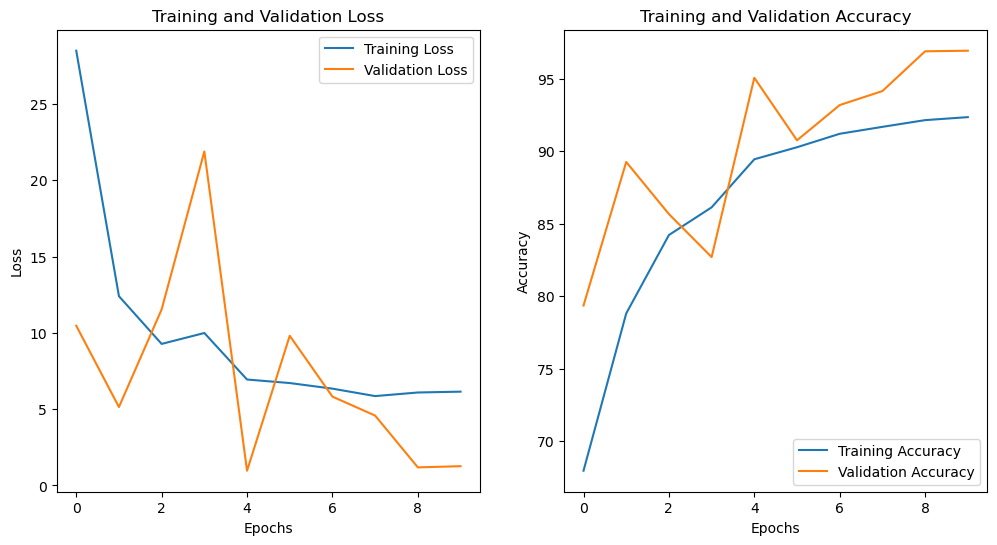

In [11]:
from torch.utils.data import DataLoader, TensorDataset

# Define a PyTorch neural network class
class DetectFraud(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DetectFraud, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
num_classes = 2
num_epochs = 10
learning_rate = 0.001

# Create a PyTorch model instance
model = DetectFraud(input_size, hidden_size, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Convert data to PyTorch tensors
X_train, y_train = torch.Tensor(X_train), torch.LongTensor(y_train)
X_val, y_val = torch.Tensor(X_val), torch.LongTensor(y_val)

# Create TensorDatasets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoader for batch processing
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Training the model
train_losses, val_losses, train_accuracy, val_accuracy = [], [], [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracy.append(100 * correct / total)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracy.append(100 * correct / total)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Training Loss: {train_losses[-1]:.4f}, '
          f'Training Accuracy: {train_accuracy[-1]:.2f}%, '
          f'Validation Loss: {val_losses[-1]:.4f}, '
          f'Validation Accuracy: {val_accuracy[-1]:.2f}%')
    
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show();

## Observation from Epochs/Steps

During the implementation of a Neural Network using the PyTorch Framework, the model was trained and validated over ten epochs. Key observations include a significant reduction in training loss from 28.49 to 6.15, with a steady increase in training accuracy to 92.36%. Validation loss fluctuated but generally decreased, ultimately reaching 1.26, while validation accuracy improved to 96.94%. These results indicate the model's capacity to learn effectively from the data, leading to improved accuracy and minimal loss during training. The validation accuracy underscores the model's capability to make accurate predictions on unseen data, showcasing its robust generalization performance.

## Final Observation Training and Validation Loss/Accuracy

The training and validation metrics for a machine learning model across ten epochs were analyzed. The training loss steadily decreased from 28% to 6%, indicating the model's improvement on the training data. In contrast, the validation loss exhibited fluctuations, peaking at 22%, suggesting issues with overfitting and model instability. Training accuracy increased from 69% to 92%, while the initial high validation accuracy 80% later recovered to 94%, implying potential overfitting. These observations highlight the need for optimization techniques to stabilize the model's generalization on unseen data. Early stopping and regularization methods may be crucial to ensure consistent and reliable model performance. In summary, while the model shows potential, addressing overfitting and ensuring consistent validation results are key steps for robust credit card fraud detection.